In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [10]:
X1=np.linspace(0,10,1000)
X2=np.linspace(0,10,1000)
X=np.vstack((X1,X2)).T

In [19]:
X=np.matrix(X)

In [14]:
y=X@np.array([[2.5],[3.7]])+np.power(X,2)@np.array([[0.5],[1.1]])+5+30*np.random.randn(1000,1)

In [20]:
y=np.matrix(y)

<IPython.core.display.Javascript object>


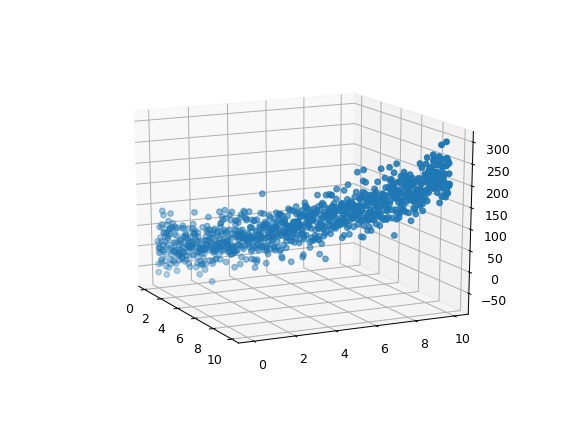

In [23]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([X[:,0]],[X[:,1]],[y])

In [24]:
def norm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=(X-X_tr_min)/(X_tr_max-X_tr_min)
    return(X)

In [25]:
X=norm(X,X)
y=norm(y,y)

In [26]:
def cost(y,y_hat):
    return (y_hat-y).T@(y_hat-y)

In [162]:
epochs=5000
# w1=np.random.randn(2,10)
# w2=np.random.randn(10,1)
# b1=np.random.randn(1,10)
# b2=np.random.randn(1,1)
eta=0.0001
Error=[]
epoch=[]
for i in range(epochs):
    y_hat=tanh(X@w1+b1)@w2+b2
    Error.append(np.array(cost(y,y_hat)))
    epoch.append(i)
    w1=w1-eta*X.T@(np.multiply((y_hat-y)@w2.T,1-np.power(tanh(X@w1+b1),2)))
    b1=b1-eta*np.sum(np.multiply((y_hat-y)@w2.T,1-np.power(tanh(X@w1+b1),2)))
    w2=w2-eta*tanh(X@w1+b1).T@(y_hat-y)
    b2=b2-eta*np.sum(y_hat-y)
    
    

In [163]:
Error[-1]

array([[6.66364381]])

<IPython.core.display.Javascript object>


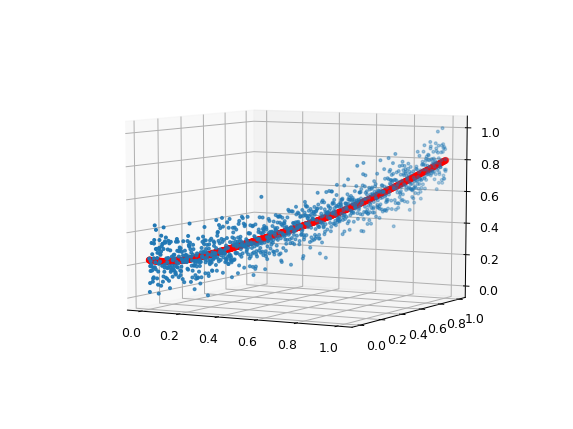

In [164]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([X[:,0]],[X[:,1]],[y], s=5)
ax.scatter([X[:,0]],[X[:,1]],tanh(X@w1+b1)@w2+b2, color="red")
